In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import PyTorch
import torch # import main library
import torch.nn as nn # import modules like nn.ReLU()
import torch.nn.functional as F # import torch functions like F.relu() and F.relu_()

In [3]:
def get_memory_allocated(device, inplace = False):
    '''
    Function measures allocated memory before and after the ReLU function call.
    INPUT:
      - device: gpu device to run the operation
      - inplace: True - to run ReLU in-place, False - for normal ReLU call
    '''
    
    # Create a large tensor
    t = torch.randn(10000, 10000, device=device)
    
    # Measure allocated memory
    torch.cuda.synchronize()
    start_max_memory = torch.cuda.max_memory_allocated() / 1024**2
    start_memory = torch.cuda.memory_allocated() / 1024**2
    
    # Call in-place or normal ReLU
    if inplace:
        # F.relu_(t)
        t.mul_(2).div_(5).mul_(7).div_(11)
    else:
        # output = F.relu(t)
        output = t.mul(2).div(5).mul(7).div(11)
    
    # Measure allocated memory after the call
    torch.cuda.synchronize()
    end_max_memory = torch.cuda.max_memory_allocated() / 1024**2
    end_memory = torch.cuda.memory_allocated() / 1024**2
    
    # Return amount of memory allocated for ReLU call
    return end_memory - start_memory, end_max_memory - start_max_memory

In [4]:
# setup the device
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")

In [5]:
# call the function to measure allocated memory
memory_allocated, max_memory_allocated = get_memory_allocated(device, inplace = False)
print('Allocated memory: {}'.format(memory_allocated))
print('Allocated max memory: {}'.format(max_memory_allocated))

Allocated memory: 382.0
Allocated max memory: 764.0


In [6]:
memory_allocated_inplace, max_memory_allocated_inplace = get_memory_allocated(device, inplace = True)
print('Allocated memory: {}'.format(memory_allocated_inplace))
print('Allocated max memory: {}'.format(max_memory_allocated_inplace))

Allocated memory: 0.0
Allocated max memory: 0.0


In [7]:
a = torch.Tensor([1])

In [8]:
print(a.grad)

None


In [9]:
print(a.requires_grad)

False


In [10]:
a = torch.nn.Parameter(torch.Tensor([1]))

In [11]:
class REFF(torch.nn.Module):
    def __init__(self, input):
        super(REFF, self).__init__()
        self.input = input
        
    def forward(self):
        return self.input

In [12]:
asad = REFF(torch.Tensor([1]))

In [13]:
asad

REFF()

In [14]:
asad()

tensor([1.])

In [15]:
asad().mul(2)

tensor([2.])

In [16]:
asad()

tensor([1.])

In [17]:
asad().mul_(2)

tensor([2.])

In [18]:
asad()

tensor([2.])

In [19]:
t = torch.tensor([[[1,2,3],[4,5,6],[7,8,9]]])
dim = 0
idx = torch.tensor([1, 2, 0])
idx_u = torch.unsqueeze(idx, dim)
idx_u = torch.unsqueeze(idx_u, dim)
torch.gather(t, dim, idx_u)


RuntimeError: Expected tensor [1, 1, 3], src [1, 3, 3] and index [1, 1, 3] to have the same size apart from dimension 0

In [ ]:
t = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
idx = torch.tensor([1, 2, 0])
torch.index_select(t, 1, idx)

In [ ]:
t = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
# torch.full_like(t, t)

if torch.is_tensor(t):
    print("is tensor")

In [ ]:
m=torch.tensor([20,30],dtype=torch.int8).cuda()
print(m)
a=torch.tensor([20,30],dtype=torch.int8).cuda()
print(a)
out=torch.matmul(m,a)
print(out)
print((30*30)%128)
input = torch.randint(128,(128,20))
print(input)
output = m(input)
print(output)

In [ ]:
import numpy as np

In [ ]:
z = np.arange(3, dtype=np.uint8)

In [ ]:
z

In [ ]:
z.astype(float)

In [ ]:
np.int8(z)

In [ ]:
z*z

In [ ]:
z*z'

In [ ]:
z = np.arange(3, dtype=np.int8)
z

In [ ]:
zz = np.arange(3, dtype=np.int8).transpose()
zz = zz.transpose()
zz

In [ ]:
out = np.matmul(z, zz)
out

In [ ]:
z_tensor = torch.tensor([0, 1, 70], dtype=torch.int8)
z_tensor

In [ ]:
out = np.matmul(z_tensor, zz, dtype=np.long)
out

In [ ]:
import numpy as np
import cupy as cp
a = np.ones(5, dtype=np.int8)
b = torch.from_numpy(a).cuda()
np.add(a, 200, out=a)
c = cp.add(b, 200, dtype=np.long)
d = cp.asnumpy(c)
print(a, a.dtype)
print(b, b.dtype)
print(c, c.dtype)
print(d, d.dtype)

In [ ]:
import torch
import cupy

from torch.utils.dlpack import to_dlpack
from torch.utils.dlpack import from_dlpack

# Create a PyTorch tensor.
tx1 = torch.randn(1, 2, 3, 4).cuda()
print(tx1)

# Convert it into a DLPack tensor.
dx = to_dlpack(tx1)
print(dx)

# Convert it into a CuPy array.
cx = cupy.fromDlpack(dx)
print(cx)

# Convert it back to a PyTorch tensor.
tx2 = from_dlpack(cx.toDlpack())
print(tx2)

In [ ]:
input = torch.tensor([[1, 2], [3, 4], [5, 6]])
torch.gt(torch.sum(input, 1), 0)

In [ ]:
a = torch.nn.Parameter(torch.tensor([1.]).type(torch.int8), requires_grad=False)
a<<2

In [ ]:
input << 1

In [ ]:
input

In [ ]:
import torch
import time
a_fp = torch.rand(20000, 10000).cuda()
b_fp = torch.rand(10000, 40000).cuda()
start_time = time.time()
c_fp = torch.matmul(a_fp, b_fp)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
import torch
import time
a_fp = torch.rand(20000, 10000).cuda()
b_fp = torch.rand(10000, 40000).cuda()
start_time = time.time()
c_fp = torch.matmul(a_fp, b_fp)
print("--- %s seconds ---" % (time.time() - start_time))

import torch
import time
import cupy as cp
import numpy as np
from torch.utils.dlpack import to_dlpack
from torch.utils.dlpack import from_dlpack
a_fx = torch.randint_like(a_fp, high=15, dtype=torch.int8).cuda()
b_fx = torch.randint_like(b_fp, high=15, dtype=torch.int8).cuda()

start_time = time.time()

# # Convert it into a DLPack tensor.
a_fx_dl = to_dlpack(a_fx)
b_fx_dl = to_dlpack(b_fx)
print(a_fx_dl, b_fx_dl)

# # Convert it into a CuPy array.
a_fx_cp = cp.fromDlpack(to_dlpack(a_fx))
b_fx_cp = cp.fromDlpack(to_dlpack(b_fx))
print(a_fx_cp.shape, b_fx_cp.shape)

c_fx_cp = cp.matmul(a_fx_cp, b_fx_cp, dtype=cp.int32)

c_fx_dl = c_fx_cp.toDlpack()

c_fx = from_dlpack(c_fx_cp.toDlpack())
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
import torch
import time
a_fp = torch.rand(20000, 10000).cuda()
b_fp = torch.rand(20000, 10000).cuda()
start_time = time.time()
c_fp = torch.add(a_fp, b_fp)
print("--- %s seconds ---" % (time.time() - start_time))

import torch
import time
import cupy as cp
import numpy as np
from torch.utils.dlpack import to_dlpack
from torch.utils.dlpack import from_dlpack
# a_fx = torch.randint_like(a_fp, high=15, dtype=torch.int8).cuda()
# b_fx = torch.randint_like(b_fp, high=15, dtype=torch.int8).cuda()
a_fx = torch.rand(20000, 10000).cuda()
b_fx = torch.rand(20000, 10000).cuda()


# # Convert it into a DLPack tensor.
a_fx_dl = to_dlpack(a_fx)
b_fx_dl = to_dlpack(b_fx)
print(a_fx_dl, b_fx_dl)

# # Convert it into a CuPy array.
a_fx_cp = cp.fromDlpack(to_dlpack(a_fx))
b_fx_cp = cp.fromDlpack(to_dlpack(b_fx))
print(a_fx_cp.dtype, b_fx_cp.dtype)

start_time_2 = time.time()
# c_fx_cp = cp.add(a_fx_cp, b_fx_cp, dtype=cp.int8)
c_fx_cp = cp.add(a_fx_cp, b_fx_cp)
print("--- %s seconds ---" % (time.time() - start_time_2))

c_fx_dl = c_fx_cp.toDlpack()

c_fx = from_dlpack(c_fx_cp.toDlpack())
print("--- %s seconds ---" % (time.time() - start_time_2))

In [ ]:
import torch
import time
a_fp = torch.rand(20000, 1000).cuda()
b_fp = torch.rand(20000, 1000).cuda()
start_time = time.time()
c_fp = torch.mul(a_fp, b_fp)
print("--- %s seconds ---" % (time.time() - start_time))

a_int8 = torch.randint_like(a_fp, high=15, dtype=torch.int8).cuda()
b_int8 = torch.randint_like(b_fp, high=15, dtype=torch.int8).cuda()
start_time = time.time()
c_int8 = torch.mul(a_int8, b_int8)
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
c_int8_or = a_int8 | b_int8
print("--- %s seconds ---" % (time.time() - start_time))
print("int8 or")

a_int16 = torch.randint_like(a_fp, high=15, dtype=torch.int16).cuda()
b_int16 = torch.randint_like(b_fp, high=15, dtype=torch.int16).cuda()
start_time = time.time()
c_int16 = torch.mul(a_int16, b_int16)
print("--- %s seconds ---" % (time.time() - start_time))

a_int32 = torch.randint_like(a_fp, high=15, dtype=torch.int32).cuda()
b_int32 = torch.randint_like(b_fp, high=15, dtype=torch.int32).cuda()
start_time = time.time()
c_int32 = torch.mul(a_int32, b_int32)
print("--- %s seconds ---" % (time.time() - start_time))

a_int64 = torch.randint_like(a_fp, high=15, dtype=torch.long).cuda()
b_int64 = torch.randint_like(b_fp, high=15, dtype=torch.long).cuda()
start_time = time.time()
c_int64 = torch.mul(a_int64, b_int64)
print("--- %s seconds ---" % (time.time() - start_time))


In [ ]:
import torch
import time
a_fp = torch.rand(20000, 1000).cuda()
b_fp = torch.rand(20000, 1000).cuda()
start_time = time.time()
c_fp = torch.add(a_fp, b_fp)
end_time = time.time()
print("fp add")
print("--- %s seconds ---" % (end_time - start_time))

a_int8 = torch.randint_like(a_fp, high=15, dtype=torch.int8).cuda()
b_int8 = torch.randint_like(b_fp, high=15, dtype=torch.int8).cuda()
start_time = time.time()
c_int8 = torch.add(a_int8, b_int8)
end_time = time.time()
print("int8 add")
print("--- %s seconds ---" % (end_time - start_time))

start_time = time.time()
c_int8_or = a_int8 | b_int8
end_time = time.time()
print("int8 or")
print("--- %s seconds ---" % (end_time - start_time))

start_time = time.time()
c_int8_or = a_int8 & b_int8
end_time = time.time()
print("int8 &")
print("--- %s seconds ---" % (end_time - start_time))

a_int16 = torch.randint_like(a_fp, high=15, dtype=torch.int16).cuda()
b_int16 = torch.randint_like(b_fp, high=15, dtype=torch.int16).cuda()
start_time = time.time()
c_int16 = torch.add(a_int16, b_int16)
end_time = time.time()
print("int16 add")
print("--- %s seconds ---" % (end_time - start_time))

start_time = time.time()
c_int16_or = a_int16 | b_int16
end_time = time.time()
print("int16 or")
print("--- %s seconds ---" % (end_time - start_time))

start_time = time.time()
c_int16_or = a_int16 & b_int16
end_time = time.time()
print("int16 &")
print("--- %s seconds ---" % (end_time - start_time))

a_int32 = torch.randint_like(a_fp, high=15, dtype=torch.int32).cuda()
b_int32 = torch.randint_like(b_fp, high=15, dtype=torch.int32).cuda()
start_time = time.time()
c_int32 = torch.add(a_int32, b_int32)
end_time = time.time()
print("int32 add")
print("--- %s seconds ---" % (end_time - start_time))

start_time = time.time()
c_int32_or = a_int32 | b_int32
end_time = time.time()
print("int32 or")
print("--- %s seconds ---" % (end_time - start_time))

start_time = time.time()
c_int32_or = a_int32 & b_int32
end_time = time.time()
print("int32 &")
print("--- %s seconds ---" % (end_time - start_time))

a_int64 = torch.randint_like(a_fp, high=15, dtype=torch.long).cuda()
b_int64 = torch.randint_like(b_fp, high=15, dtype=torch.long).cuda()
start_time = time.time()
c_int64 = torch.add(a_int64, b_int64)
end_time = time.time()
print("int64 add")
print("--- %s seconds ---" % (end_time - start_time))

start_time = time.time()
c_int64_or = a_int64 | b_int64
end_time = time.time()
print("int64 or")
print("--- %s seconds ---" % (end_time - start_time))

start_time = time.time()
c_int64_or = a_int64 & b_int64
end_time = time.time()
print("int64 &")
print("--- %s seconds ---" % (end_time - start_time))

In [ ]:
import torch
import time
a_fp = torch.rand(20000, 1000).cuda()
b_fp = torch.rand(20000, 1000).cuda()
start_time = time.time()
a_fp = a_fp.type(torch.float)
b_fp = b_fp.type(torch.float)
c_fp = torch.add(a_fp, b_fp)
c_fp = c_fp.type(torch.float)
print("--- %s seconds ---" % (time.time() - start_time))

a_int8 = torch.randint_like(a_fp, high=15, dtype=torch.int8).cuda()
b_int8 = torch.randint_like(b_fp, high=15, dtype=torch.int8).cuda()
start_time = time.time()
c_int8 = torch.add(a_int8.to(torch.float), b_int8.to(torch.float)).to(torch.int8)
print("--- %s seconds ---" % (time.time() - start_time))

a_int16 = torch.randint_like(a_fp, high=15, dtype=torch.int16).cuda()
b_int16 = torch.randint_like(b_fp, high=15, dtype=torch.int16).cuda()
start_time = time.time()
c_int16 = torch.add(a_int16.to(torch.float), b_int16.to(torch.float)).to(torch.int16)
print("--- %s seconds ---" % (time.time() - start_time))

a_int32 = torch.randint_like(a_fp, high=15, dtype=torch.int32).cuda()
b_int32 = torch.randint_like(b_fp, high=15, dtype=torch.int32).cuda()
start_time = time.time()
c_int32 = torch.add(a_int32.to(torch.float), b_int32.to(torch.float)).to(torch.int32)
print("--- %s seconds ---" % (time.time() - start_time))

a_int64 = torch.randint_like(a_fp, high=15, dtype=torch.long).cuda()
b_int64 = torch.randint_like(b_fp, high=15, dtype=torch.long).cuda()
start_time = time.time()
c_int64 = torch.add(a_int64.to(torch.float), b_int64.to(torch.float)).to(torch.long)
print("--- %s seconds ---" % (time.time() - start_time))


In [ ]:
dtype = torch.float
dtype

In [ ]:
a = torch.tensor(1.).type(torch.float)
b = torch.tensor(3.).type(torch.float)
a & b

In [ ]:
input = torch.tensor([[1,2],[3,4],[5,6]])
output = torch.index_select(input, 1, torch.tensor([0]))
output

In [ ]:
input = torch.tensor([1, 2, 3, 4])
input[1].view(1).size()


In [ ]:
import torch
kernel_fr_wr = torch.nn.Linear(8, 8, bias=False)
rand = torch.rand(8, 8)
print(rand)

In [ ]:
kernel_fr_wr.data

In [ ]:
kernel_fr_wr.data = rand.clone()

In [ ]:
print(kernel_fr_wr.data)

In [ ]:
rand[0, 0] = 1

In [ ]:
rand

In [ ]:
print(kernel_fr_wr.data)

In [ ]:
import numpy as np
a = [[1+1j, 2+2j]]
b = [[3+3j, 4+4j],
     [5+5j, 6+6j]]
np.matmul(a, b)

In [ ]:
import numpy as np
a = 1.
b = 1.
c = a + b * 1.j
c

In [ ]:
import time
import torch
a = torch.randn(10000000)
b = torch.randn(10000000)

start_time = time.time()
c = a + b
print("add")
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
c = a * b
print("mul")
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
c = a / b
print("div")
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
c = torch.log(a)
print("log")
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
c = torch.exp(a)
print("exp")
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
c = torch.softmax(a,dim=0)
print("softmax")
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
c = torch.log_softmax(a,dim=0)
print("log_softmax")
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
c = torch.tanh(a)
print("tanh")
print("--- %s seconds ---" % (time.time() - start_time))


In [ ]:
import time
import torch
a = torch.randn(10000000).cuda()
b = torch.randn(10000000).cuda()

start_time = time.time()
c = a + b
print("add")
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
c = a * b
print("mul")
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
c = a / b
print("div")
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
c = torch.log(a)
print("log")
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
c = torch.exp(a)
print("exp")
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
c = torch.softmax(a,dim=0)
print("softmax")
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
c = torch.log_softmax(a,dim=0)
print("log_softmax")
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
c = torch.tanh(a)
print("tanh")
print("--- %s seconds ---" % (time.time() - start_time))


In [ ]:
import torch
rand = torch.rand(8, 8)
print(rand.size())

In [ ]:
import torch
idx = torch.rand(8, 4).mul(8).type(torch.long)
print(idx.size())
print(idx)

rng = torch.rand(8).mul(8).type(torch.long)
print(rng.size())
print(rng)

rand_sel = rng[idx]
print(rand_sel.size())
print(rand_sel)

rand = torch.rand(8, 4).mul(8).type(torch.long)
print(rand.size())
print(rand[rand_sel].size())
print(rand[rand_sel])

In [ ]:
idx = torch.nn.Parameter(torch.rand(8, 4).mul(8))
print(idx.size())
print(idx)
idx_floor = idx.floor()
print(idx_floor)

In [ ]:
from UnarySim.sw.bitstream.gen import RNG
rng = RNG()

In [ ]:
print(rng())

In [ ]:
import torch
input = torch.tensor([x for x in range(64, 2**8)]).type(torch.float)/2**8
print(input)
print(input.size())

In [ ]:
import numpy as NP
from matplotlib import pyplot as PLT
from matplotlib import cm as CM

A = NP.random.randint(10, 100, 100).reshape(10, 10)
mask =  NP.tri(A.shape[0], k=-1)
A = NP.ma.array(A, mask=mask) # mask out the lower triangle
fig = PLT.figure()
ax1 = fig.add_subplot(111)
cmap = CM.get_cmap('jet', 10) # jet doesn't have white color
cmap.set_bad('w') # default value is 'k'
ax1.imshow(A, interpolation="nearest", cmap=cmap)
ax1.grid(True)
PLT.show()

In [ ]:
a =NP.random((10,10))
imshow(a, interpolation='nearest')

b = ones(a.shape+(4,)) # «white» matrix with alpha=1
for i in range(a.shape[0]):
    for j in range(i, a.shape[1]):
        b[i,j,3] = 0   # upper triangle, alpha = 0
imshow(b, interpolation='nearest')

In [1]:
import torch
from UnarySim.sw.kernel.div import UnaryDiv
from UnarySim.sw.stream.gen import RNG, SourceGen, BSGen
from UnarySim.sw.metric.metric import ProgressiveError
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker, cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import time
import math
import numpy as np
import seaborn as sns
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
def test(mode="unipolar", 
         depth_abs=4, 
         depth_kernel=4, 
         depth_sync=2, 
         shiftreg=False, 
         rng="Sobol", 
         rng_dim=4, 
         bitwidth=8, 
         total_cnt=100, 
         savepdf=False):
    
    stype = torch.float
    btype = torch.float
    rtype = torch.float

    print("========================================================")
    print(mode)
    print("========================================================")
    if mode is "unipolar":
        # all values in unipolar are non-negative
        # dividend is always non greater than divisor
        # divisor is non-zero
        low_bound = 0
        up_bound = 2**bitwidth
    elif mode is "bipolar":
        # values in bipolar are arbitrarily positive or negative
        # abs of dividend is always non greater than abs of divisor
        # abs of divisor is non-zero
        low_bound = -2**(bitwidth-1)
        up_bound = 2**(bitwidth-1)

    divisor_list = []
    dividend_list = []
    for divisor_val in range(up_bound, low_bound-1, -1):
        divisor_list.append([])
        dividend_list.append([])
        for dividend_val in range(low_bound, up_bound+1, 1):
            divisor_list[up_bound-divisor_val].append(divisor_val)
            dividend_list[up_bound-divisor_val].append(dividend_val)
    
    dividend = torch.tensor(dividend_list).type(torch.float).div(up_bound).to(device)
    divisor = torch.tensor(divisor_list).type(torch.float).div(up_bound).to(device)
    quotient = dividend.div(divisor)
    
    # find the invalid postions in quotient
    quotient_nan = torch.isnan(quotient)
    quotient_inf = torch.isinf(quotient)
    quotient_mask = quotient_nan + quotient_inf
    quotient[quotient_mask] = 0
    quotient = quotient.clamp(-1, 1)
    
    quotientPE = ProgressiveError(quotient, mode=mode).to(device)
    
    dividendPE = ProgressiveError(dividend, mode=mode).to(device)
    dividendSRC = SourceGen(dividend, bitwidth, mode=mode, rtype=rtype)().to(device)
    
    divisorPE  = ProgressiveError(divisor,  mode=mode).to(device)
    divisorSRC = SourceGen(divisor, bitwidth, mode=mode, rtype=rtype)().to(device)
    
    result_pe_total = []
    for rand_idx in range(1, total_cnt+1):
        dut_div = UnaryDiv(depth_abs=depth_abs, 
                       depth_kernel=depth_kernel, 
                       depth_sync=depth_sync, 
                       shiftreg_abs=shiftreg, 
                       mode=mode, 
                       rng=rng, 
                       rng_dim=rng_dim, 
                       stype=stype, 
                       btype=btype).to(device)
        # define the bit stream regen for dividend and divisor
        regenRNG = RNG(bitwidth, rand_idx+2, rng, rtype)().to(device)

        maxCNT = 2**bitwidth - 1

        dividendCNT = torch.zeros_like(dividend) + 2**(bitwidth - 1)
        dividendBS_regen = BSGen(dividendCNT, regenRNG, stype).to(device)

        divisorCNT = torch.zeros_like(dividend) + 2**(bitwidth - 1)
        divisorBS_regen = BSGen(divisorCNT, regenRNG, stype).to(device)
    
        dividendRNG = RNG(bitwidth, rand_idx, rng, rtype)().to(device)
        dividendBS = BSGen(dividendSRC, dividendRNG, stype).to(device)
        divisorRNG = RNG(bitwidth, rand_idx+1, rng, rtype)().to(device)
        divisorBS = BSGen(divisorSRC, divisorRNG, stype).to(device)
        with torch.no_grad():
            start_time = time.time()
            for i in range(2**bitwidth):
                dividend_bs = dividendBS(torch.tensor([i]))
                dividendPE.Monitor(dividend_bs)

                divisor_bs = divisorBS(torch.tensor([i]))
                divisorPE.Monitor(divisor_bs)

                dividendCNT = (dividendCNT + dividend_bs*2 - 1).clamp(0, maxCNT)
                dividendBS_regen.source = dividendCNT.clone().detach()
                dividend_bs_regen = dividendBS_regen(torch.tensor([i]))

                divisorCNT  = ( divisorCNT +  divisor_bs*2 - 1).clamp(0, maxCNT)
                divisorBS_regen.source = divisorCNT.clone().detach()
                divisor_bs_regen  =  divisorBS_regen(torch.tensor([i]))

                quotient_bs = dut_div(dividend_bs_regen, divisor_bs_regen)
                quotientPE.Monitor(quotient_bs)
        
        # get the result for different rng
        result_pe = quotientPE()[1].cpu().numpy()
        result_pe[quotient_mask.cpu().numpy()] = np.nan
        result_pe_total.append(result_pe)
    
    # get the result for different rng
    result_pe_total = np.array(result_pe_total)
    
    #######################################################################
    # check the error of all simulation
    #######################################################################
    result_pe_total_no_nan = result_pe_total[~np.isnan(result_pe_total)]
    print("RMSE:{:1.4}".format(math.sqrt(np.mean(result_pe_total_no_nan**2))))
    print("MAE: {:1.4}".format(np.mean(np.abs(result_pe_total_no_nan))))
    print("bias:{:1.4}".format(np.mean(result_pe_total_no_nan)))
    print("max: {:1.4}".format(np.max(result_pe_total_no_nan)))
    print("min: {:1.4}".format(np.min(result_pe_total_no_nan)))

    #######################################################################
    # check the error according to input value
    #######################################################################
    avg_total = np.mean(result_pe_total, axis=0)
    avg_total[quotient_mask.cpu().numpy()] = 0
    fig, ax = plt.subplots()
    fig.set_size_inches(4, 4)
    axis_len = quotientPE()[1].size()[0]
    divisor_y_axis = []
    dividend_x_axis = []
    for axis_index in range(axis_len):
        divisor_y_axis.append((up_bound-axis_index/(axis_len-1)*(up_bound-low_bound))/up_bound)
        dividend_x_axis.append((axis_index/(axis_len-1)*(up_bound-low_bound)+low_bound)/up_bound)
    X, Y = np.meshgrid(dividend_x_axis, divisor_y_axis)
    Z = avg_total
    levels = [-0.06, -0.04, -0.02, 0.00, 0.02, 0.04, 0.06]
    levels = [-0.09, -0.06, -0.03, 0.00, 0.03, 0.06, 0.09]
    cs = plt.contourf(X, Y, Z, levels, cmap=cm.RdBu, extend="both")
    cbar = fig.colorbar(cs)
    
    # plt.tight_layout()
    plt.xticks(np.arange(low_bound/up_bound, up_bound/up_bound+0.1, step=0.5))
    ax.xaxis.set_ticklabels([])
    plt.yticks(np.arange(low_bound/up_bound, up_bound/up_bound+0.1, step=0.5))
    ax.yaxis.set_ticklabels([])
    
    if savepdf is True:
        plt.savefig("div-"+mode+"-bw"+str(bitwidth)+"-cordivkernel-in-stream"+".pdf", 
                    dpi=300, 
                    bbox_inches='tight')
                
    plt.show()
    plt.close()

unipolar
RMSE:0.06789
MAE: 0.03596
bias:0.02409
max: 0.9961
min: -0.2185


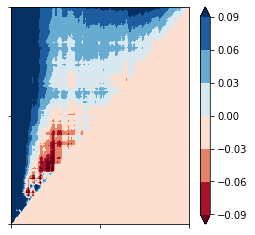

In [2]:
test(mode="unipolar", depth_abs=4, depth_kernel=4, depth_sync=2, shiftreg=False, rng="Sobol", rng_dim=4, bitwidth=8, total_cnt=1)

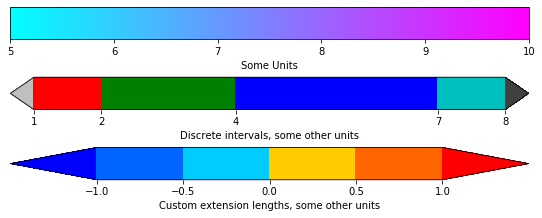

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Make a figure and axes with dimensions as desired.
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
ax2 = fig.add_axes([0.05, 0.475, 0.9, 0.15])
ax3 = fig.add_axes([0.05, 0.15, 0.9, 0.15])

# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=5, vmax=10)

# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.  There are many more kwargs, but the
# following gives a basic continuous colorbar with ticks
# and labels.
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Some Units')

# The second example illustrates the use of a ListedColormap, a
# BoundaryNorm, and extended ends to show the "over" and "under"
# value colors.
cmap = mpl.colors.ListedColormap(['r', 'g', 'b', 'c'])
cmap.set_over('0.25')
cmap.set_under('0.75')

# If a ListedColormap is used, the length of the bounds array must be
# one greater than the length of the color list.  The bounds must be
# monotonically increasing.
bounds = [1, 2, 4, 7, 8]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb2 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
                                norm=norm,
                                # to use 'extend', you must
                                # specify two extra boundaries:
                                boundaries=[0] + bounds + [13],
                                extend='both',
                                ticks=bounds,  # optional
                                spacing='proportional',
                                orientation='horizontal')
cb2.set_label('Discrete intervals, some other units')

# The third example illustrates the use of custom length colorbar
# extensions, used on a colorbar with discrete intervals.
cmap = mpl.colors.ListedColormap([[0., .4, 1.], [0., .8, 1.],
                                  [1., .8, 0.], [1., .4, 0.]])
cmap.set_over((1., 0., 0.))
cmap.set_under((0., 0., 1.))

bounds = [-1., -.5, 0., .5, 1.]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb3 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap,
                                norm=norm,
                                boundaries=[-10] + bounds + [10],
                                extend='both',
                                # Make the length of each extension
                                # the same as the length of the
                                # interior colors:
                                extendfrac='auto',
                                ticks=bounds,
                                spacing='uniform',
                                orientation='horizontal')
cb3.set_label('Custom extension lengths, some other units')

plt.show()

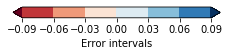

In [13]:
# If a ListedColormap is used, the length of the bounds array must be
# one greater than the length of the color list.  The bounds must be
# monotonically increasing.
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker, cm

fig = plt.figure(figsize=(3.2, 1))
ax = fig.add_axes([0, 0, 0.9, 0.15])
cmap = cm.RdBu
bounds = [-0.12, -0.09, -0.06, -0.03, 0.00, 0.03, 0.06, 0.09, 0.12]
# bounds = [-0.09, -0.06, -0.03, 0.00, 0.03, 0.06, 0.09]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                # to use 'extend', you must
                                # specify two extra boundaries:
                                boundaries=bounds,
                                extend='both',
#                                 ticks=bounds,  # optional
                                spacing='uniform',
                                orientation='horizontal')
cb2.set_label('Error intervals')

plt.show()

unipolar
RMSE:0.06789
MAE: 0.03596
bias:0.02409
max: 0.9961
min: -0.2185


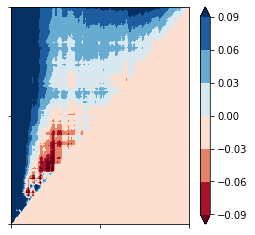

In [3]:
test(mode="unipolar", depth_abs=4, depth_kernel=4, depth_sync=2, shiftreg=False, rng="Sobol", rng_dim=4, bitwidth=8, total_cnt=1)